# FDM Natural Language Processing Project Presentation

### Alex Mcgrigor, Nathaniel Hitch

In [47]:
import pandas as pd
import numpy as np
import nltk
import re
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

### Data Description 

In [48]:
data1 = pd.read_csv('train.csv')
data1 = data1.drop(columns='selected_text')
data1.describe()

,textID,text,sentiment
count,27481,27480,27481
unique,27481,27480,3
top,35587b3eaf,i should be 'bus stalking' right now..i soo wi...,neutral
freq,1,1,11118


In [49]:
data1.head(5)

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


### Shows the distribution of tweets across classes 

In [50]:
positiveCount = 0
negativeCount = 0
neutralCount = 0
for sentiment in data1['sentiment']:
    sentiment = sentiment.lower()
    if sentiment == 'negative':
        negativeCount += 1
    elif sentiment == 'positive':
        positiveCount += 1
    elif sentiment == 'neutral':
        neutralCount += 1
    else:
        pass

Negative Tweets:  7781 : Positive Tweets 8582 : Neutral Tweets:  11118


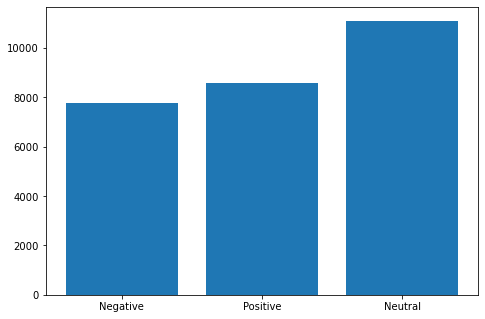

In [51]:
print('Negative Tweets: ', negativeCount, ': Positive Tweets', positiveCount, ': Neutral Tweets: ', neutralCount)
counts = [negativeCount,positiveCount,neutralCount]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Negative','Positive','Neutral']
ax.bar(labels,counts)
plt.show()

### Normalization of Text
In order to visualize the data cleanly, we have to perform the first cleaning method:
- convert text to lowercase
- remove puntuation

In [52]:
# This method normalizes the text into a coherent format for matching
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.lower() # Convert to lowercase
    df[text_field] = df[text_field].str.replace('http','') # removing urls is useful to make vocabulary small as possible
    df[text_field] = df[text_field].str.replace('com', '') # same as above.
    df[text_field] = df[text_field].str.replace(r"@\S+", " ")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at") #  replacing at sign for a word
    df[text_field] = df[text_field].str.replace(".", " ")
    df[text_field] = df[text_field].str.replace(",", " ")
    df[text_field] = df[text_field].str.replace("-", " ")
    df[text_field] = df[text_field].str.replace("(", " ")
    df[text_field] = df[text_field].str.replace(")", " ")
    df[text_field] = df[text_field].str.replace('"', " ")
    df[text_field] = df[text_field].str.replace("?", "")
    df[text_field] = df[text_field].str.replace("!", "")
    return df

### Tokenisation
This method splits each Tweet in it's separated words. The reason for this is so we can analyse what sort of words we are dealing with and conduct a frequency analysis.

In [53]:
def tokenizer(x):
    listOfTokens = []
    for text in x:
        text = str(text)
        text = word_tokenize(text)
        listOfTokens.append(text)
    return listOfTokens

This method produces a standardized format for the data to be easily analysed and visualized.

In [54]:
#Before
data1.head(5)

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [55]:
#After
data2 = pd.read_csv(r'rawData.csv')
data2.head(5)

,textID,text,sentiment
0,cb774db0d1,"['i', '`', 'd', 'have', 'responded', 'if', 'i'...",neutral
1,549e992a42,"['sooo', 'sad', 'i', 'will', 'miss', 'you', 'h...",negative
2,088c60f138,"['my', 'boss', 'is', 'bullying', 'me']",negative
3,9642c003ef,"['what', 'interview', 'leave', 'me', 'alone']",negative
4,358bd9e861,"['sons', 'of', 'why', 'couldn', '`', 't', 'the...",negative


### Text Statistics
- Tweet length analysis,
- Word frequency analysis
- Average word length analysis,

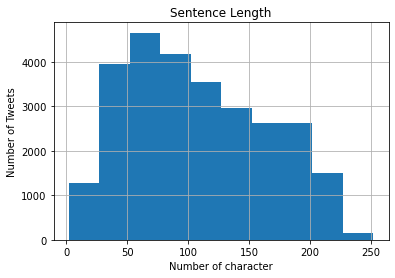

In [56]:
data2['text'].str.len().hist()
x = plt.xlabel('Number of character')
y = plt.ylabel('Number of Tweets')
plt.title('Sentence Length')
plt.show()

Text(0.5, 1.0, 'Word Frequency')

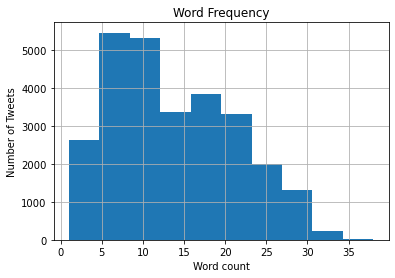

In [57]:
data2['text'].str.split().\
    map(lambda x: len(x)).\
    hist()
x = plt.xlabel('Word count')
y = plt.ylabel('Number of Tweets')
plt.title('Word Frequency')

Text(0.5, 1.0, 'Avergage word length')

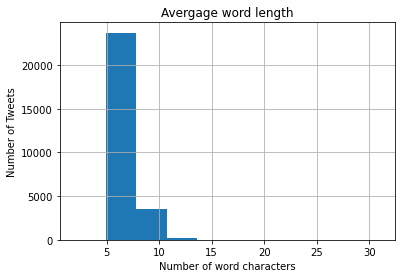

In [58]:
data2['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
x = plt.xlabel('Number of word characters')
y = plt.ylabel('Number of Tweets')
plt.title('Avergage word length')

### Word frequency Analysis 

In [59]:
token_list = data2['text'].tolist()
list_corpus = []
for tokens in token_list:
    tokens = tokens.replace("[","").replace("]","").replace("'","").replace(",","")
    list_corpus.append(tokens)

In [60]:
from nltk.tokenize import word_tokenize
listOfTokens = []
def tokenizer(x):
    for text in x:
        text = str(text)
        text = word_tokenize(text)# You can also use sent_tokenize depending on what type of NLP you do
        listOfTokens.append(text)
tokenizer(list_corpus) #change to data['text'] for original word count
#Print what text data looks like in first tweet

all_words = [token for tokens in listOfTokens for token in tokens]
sentence_lengths = [len(tokens) for tokens in listOfTokens]
Vocabulary = sorted(list(set(all_words)))
print("%s tokens total, with a vocabulary size of %s" % (len(all_words), len(Vocabulary)))

378836 tokens total, with a vocabulary size of 26322


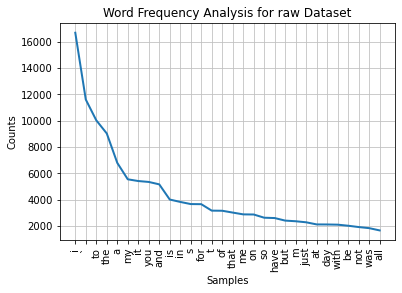

In [61]:
afd = nltk.FreqDist(all_words)
plt.title('Word Frequency Analysis for raw Dataset')
afd.plot(30,cumulative=False)


In [62]:
#Define stopword dictionary
stop_words =['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself',
            'yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself',
            'they','them','their','theirs','themselves','what','which','who','whom','this','that',
            'these','those','am','is','are','was','were','be','been','being','have','has','had',
            'having','do','does','did','doing','a','an','the','and','but','if','or','because','as',
            'until','while','of','at','by','for','with','about','against','between','into','through',
            'during','before','after','above','below','to','from','up','down','in','out','on','off',
            'over','under','again','further','then','once','here','there','when','where','why','how',
            'all','any','both','each','few','more','most','other','some','such',
            'only','own','same','so','than','too','very','can','will','just','should',
            'now','uses','use','using','used','one','also']

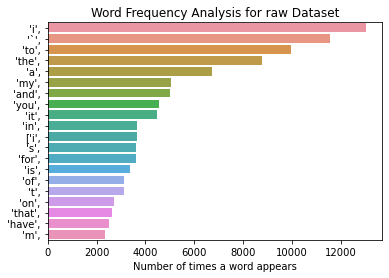

In [63]:
corpus=[]
new = data2['text'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

counter = Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stop_words):
        x.append(word)
        y.append(count)
plt.xlabel('Number of times a word appears')
plt.title('Word Frequency Analysis for raw Dataset')        
sns.barplot(x=y,y=x)

Theres still a lot of text that needs to be cleaned up in order to show what words are the most common.

### Stopword Removal Method:
Stop words are words that dont contribute much meaning to a sentence and therefore must be removed. This also reduces any noise for the models later in the process to learn.

In [64]:
def stopwordRemoval(list_object):
    listOfTokens = []
    for tweet in list_object:
        temp = []
        for word in tweet:
            if not word in stop_words:
                temp.append(word)
        listOfTokens.append(temp)
    return listOfTokens

Other cleaning methods were also used in the process:
- Contraction Expansion
- single word removal
- number removal
- lemmatization

Dictionaries Created:
- Contractions
- POS Tags
- Stopwords

In [65]:
data3 = pd.read_csv(r'cleanedData.csv')
data3.head(5)

,textID,text,sentiment
0,cb774db0d1,"['would', 'respond', 'go']",neutral
1,549e992a42,"['sooo', 'sad', 'miss', 'san', 'diego']",negative
2,088c60f138,"['boss', 'bully']",negative
3,9642c003ef,"['interview', 'leave', 'alone']",negative
4,358bd9e861,"['son', 'could', 'not', 'put', 'release', 'alr...",negative


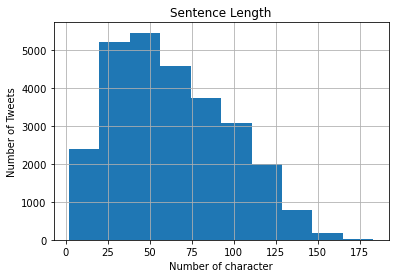

In [66]:
data3['text'].str.len().hist()
x = plt.xlabel('Number of character')
y = plt.ylabel('Number of Tweets')
plt.title('Sentence Length')
plt.show()

Text(0.5, 1.0, 'Word Frequency')

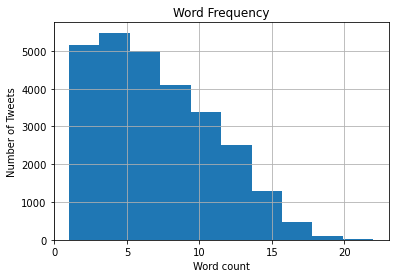

In [67]:
data3['text'].str.split().\
    map(lambda x: len(x)).\
    hist()
x = plt.xlabel('Word count')
y = plt.ylabel('Number of Tweets')
plt.title('Word Frequency')

Text(0.5, 1.0, 'Avergage word length')

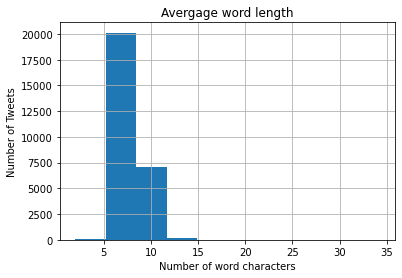

In [68]:
data3['text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
x = plt.xlabel('Number of word characters')
y = plt.ylabel('Number of Tweets')
plt.title('Avergage word length')

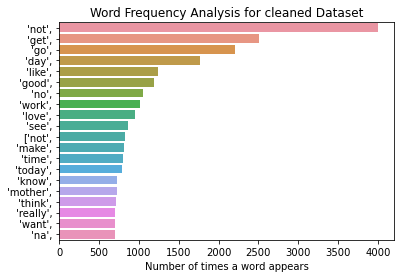

In [69]:
corpus=[]
new = data3['text'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

counter = Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    if (word not in stop_words):
        x.append(word)
        y.append(count)
plt.xlabel('Number of times a word appears')
plt.title('Word Frequency Analysis for cleaned Dataset')        
sns.barplot(x=y,y=x)

### Word Cloud Analysis
Now that the data has been cleaned, we can visualize which words are the most common in tweets for all the classses.

### Positive Word Cloud

<img src="positiveWordCloud.png">

### Negative Word Cloud
<img src="negativeWordCloud.png">

### Neutral Word Cloud
<img src="neutralWordCloud.png">

## Vectorization Stage

- The purpose of this stage is to find an effective means of representing the text data in a numerical format.

- Machine learning algorithms prefer well defined, fixed-length inputs and outputs.


### Two main vectorization methods were selected:


- 1) Bag-of-Words (Count)


- 2) Term Frequency- Inverse Document Frequency (TF-IDF)

### BOW
The model involves two main things:

1. A vocabulary of known words:
 constructing a document corpus (a collection of written texts), consisting of unique words in the whole text. Similar to a dictionary with each index corresponding to word.

Example: 4 reviews for an Italian pasta dish:
•This pasta is vert tasty and affordable.
•This pasta is not tasty and is affordable.
•This past is delicious and cheap.
•Pasta is tasty and pasta tastes good.

Counting: there are 12 unique words.

2. A measure of the presense of known words
 Taking the first review, we can plot the count of each unique word for each review.


<img src="bowModel.png">

### TF-IDF
- TF-IDF is a numerical statistic intended to show how important a word is in a document in a collection or corpus.

- The concept counts the number of times the word appears in a document and figures out the frequency that the word appears in a document out of all the words in the document:

## Selecting our Classification Algorithms

### Three main Classifiers were selected:


- 1) Logistic Regression


- 2) Multinominal Naive Bayes


- 3) Support Vector Machine

<img src="machineLearningFlow.png">

### Logistic Regression:

- Is a mathematical model used in statistics to estimate (guess) the probability of an event occurring having been given some previous data

### Multinominal Naive Bayes

- Refers to conditional independence of each of the features in the model.
- This is a Naive Bayes classifier which uses a multinomial distribution for each of the features.
- Multinominal

### Support Vector Machines

- An SVM training algorithm builds a model that assigns new examples to one category or the other

- A SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible

## Results:

<img src="accuracyRawData.png">

<img src="accuracyCleanData.png">

### Full Results Table
<img src="nlpFirstResults.png">

## Future Work

- Go back into cleaning methods and find consider different clues:

       - Punctuation e.g. ***
       
       - Emoji Recognition: patterns e.g. -->  :)
       
       - Negation handling, double negation handling
       
       - intensifiers -- !
       
       - sarcasm handling --> ?